# Lab2
By Yurii Voieividka

## Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 


warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./train.csv')
x_train = raw_data.drop(labels=['label'], axis=1)
y_train = raw_data['label']

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size =0.1, random_state=2)
print("x_train shape",x_train.shape)

x_train shape (37800, 784)


In [4]:
#Normilize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (37800, 784)
x_test shape: (4200, 784)


In [5]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [6]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print(y_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.1, random_state=2)
print("x_train shape",x_train.shape)

x_train shape (34020, 28, 28, 1)


In [8]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam, Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

2022-10-28 12:00:39.578667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
optimizer = Adadelta(lr=0.001)

In [10]:
#Compile
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
epochs = 10
batch_size = 250

In [12]:
#Data Augumentation

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False)

In [13]:
datagen.fit(x_train)

In [14]:

history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size )

Epoch 1/10
136/136 [==============================] - 7s 47ms/step - loss: 2.3150 - accuracy: 0.1012 - val_loss: 2.3070 - val_accuracy: 0.1061
Epoch 2/10
136/136 [==============================] - 6s 47ms/step - loss: 2.3150 - accuracy: 0.1008 - val_loss: 2.3064 - val_accuracy: 0.1050
Epoch 3/10
136/136 [==============================] - 6s 47ms/step - loss: 2.3151 - accuracy: 0.1007 - val_loss: 2.3059 - val_accuracy: 0.1042
Epoch 4/10
136/136 [==============================] - 7s 50ms/step - loss: 2.3148 - accuracy: 0.1005 - val_loss: 2.3053 - val_accuracy: 0.1040
Epoch 5/10
136/136 [==============================] - 6s 47ms/step - loss: 2.3139 - accuracy: 0.1002 - val_loss: 2.3048 - val_accuracy: 0.1034
Epoch 6/10
136/136 [==============================] - 6s 46ms/step - loss: 2.3141 - accuracy: 0.0988 - val_loss: 2.3043 - val_accuracy: 0.1037
Epoch 7/10
136/136 [==============================] - 6s 47ms/step - loss: 2.3130 - accuracy: 0.1023 - val_loss: 2.3039 - val_accuracy: 0.1034

### Loss of Adadelta

<AxesSubplot:title={'center':'Adadelta'}>

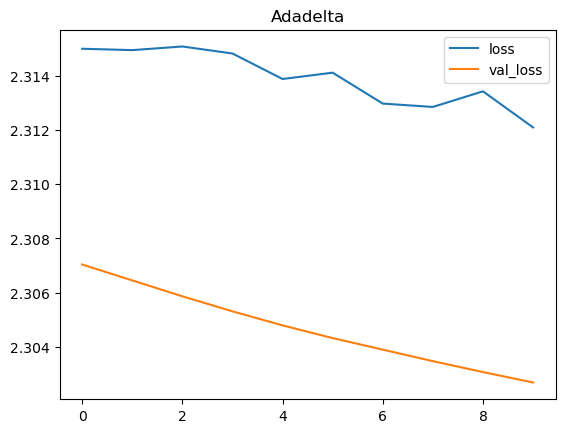

In [15]:
# plt.plot(history.history['val_loss'], color='b', label="validation loss")
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Adadelta")


In [16]:
# Optimizer Adam

model_2 = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model_2.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
136/136 [==============================] - 7s 47ms/step - loss: 2.2130 - accuracy: 0.1800 - val_loss: 1.8309 - val_accuracy: 0.3177
Epoch 2/10
136/136 [==============================] - 6s 46ms/step - loss: 1.9557 - accuracy: 0.2980 - val_loss: 1.3493 - val_accuracy: 0.6148
Epoch 3/10
136/136 [==============================] - 6s 46ms/step - loss: 1.7942 - accuracy: 0.3714 - val_loss: 1.0190 - val_accuracy: 0.7251
Epoch 4/10
136/136 [==============================] - 6s 46ms/step - loss: 1.6550 - accuracy: 0.4273 - val_loss: 0.7704 - val_accuracy: 0.8124
Epoch 5/10
136/136 [==============================] - 6s 46ms/step - loss: 1.5695 - accuracy: 0.4529 - val_loss: 0.6401 - val_accuracy: 0.8370
Epoch 6/10
136/136 [==============================] - 6s 46ms/step - loss: 1.5044 - accuracy: 0.4804 - val_loss: 0.5016 - val_accuracy: 0.8937
Epoch 7/10
136/136 [==============================] - 6s 45ms/step - loss: 1.4591 - accuracy: 0.4969 - val_loss: 0.4601 - val_accuracy: 0.8868

### Loss Of Adam

<AxesSubplot:title={'center':'Adam'}>

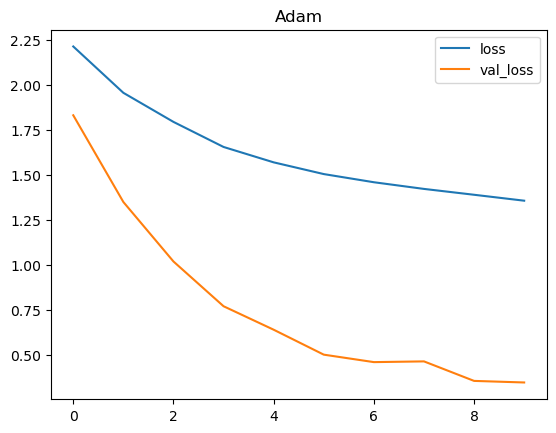

In [17]:
history_df = pd.DataFrame(history.history)
# plt.plot(, color='b', label="validation loss")
# plt.title("Loss with adam")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


In [18]:
# Preventing Overfitting

from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

model_3 = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])


In [19]:
model_3.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
history = model_3.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[early_stopping])

Epoch 1/10
136/136 [==============================] - 7s 46ms/step - loss: 2.0702 - accuracy: 0.2342 - val_loss: 1.3018 - val_accuracy: 0.5921
Epoch 2/10
136/136 [==============================] - 6s 45ms/step - loss: 1.6915 - accuracy: 0.3984 - val_loss: 0.8387 - val_accuracy: 0.7741
Epoch 3/10
136/136 [==============================] - 6s 45ms/step - loss: 1.5263 - accuracy: 0.4640 - val_loss: 0.6362 - val_accuracy: 0.8429
Epoch 4/10
136/136 [==============================] - 6s 45ms/step - loss: 1.4293 - accuracy: 0.4999 - val_loss: 0.4922 - val_accuracy: 0.8823
Epoch 5/10
136/136 [==============================] - 6s 45ms/step - loss: 1.3630 - accuracy: 0.5248 - val_loss: 0.4262 - val_accuracy: 0.8862
Epoch 6/10
136/136 [==============================] - 6s 45ms/step - loss: 1.3148 - accuracy: 0.5429 - val_loss: 0.3954 - val_accuracy: 0.8918
Epoch 7/10
136/136 [==============================] - 6s 45ms/step - loss: 1.2769 - accuracy: 0.5548 - val_loss: 0.3302 - val_accuracy: 0.9220

### Loss after increasing Dropout and adding additional Dense layer

<AxesSubplot:title={'center':'Adam'}>

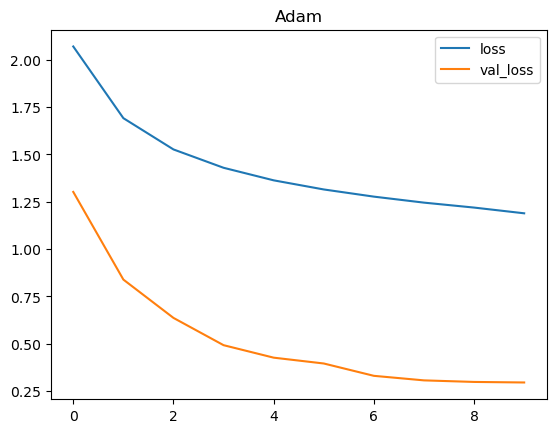

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


### Playing with parameters

In [22]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = True,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.1,
    zoom_range=0.4,
    width_shift_range=0.9,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [23]:
model_3 = Sequential([
    Conv2D(filters = 8, kernel_size = (12,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(filters = 16, kernel_size = (3,5), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
model_3.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
history = model_3.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[early_stopping])

Epoch 1/10
136/136 [==============================] - 8s 54ms/step - loss: 2.1018 - accuracy: 0.2211 - val_loss: 1.5481 - val_accuracy: 0.4656
Epoch 2/10
136/136 [==============================] - 7s 54ms/step - loss: 1.8884 - accuracy: 0.3076 - val_loss: 1.3373 - val_accuracy: 0.5201
Epoch 3/10
136/136 [==============================] - 7s 54ms/step - loss: 1.7799 - accuracy: 0.3447 - val_loss: 1.1625 - val_accuracy: 0.6122
Epoch 4/10
136/136 [==============================] - 7s 52ms/step - loss: 1.7238 - accuracy: 0.3712 - val_loss: 1.0149 - val_accuracy: 0.6315
Epoch 5/10
136/136 [==============================] - 7s 55ms/step - loss: 1.6750 - accuracy: 0.3861 - val_loss: 0.9883 - val_accuracy: 0.6466
Epoch 6/10
136/136 [==============================] - 8s 60ms/step - loss: 1.6581 - accuracy: 0.3901 - val_loss: 0.8591 - val_accuracy: 0.7175
Epoch 7/10
136/136 [==============================] - 8s 57ms/step - loss: 1.6373 - accuracy: 0.4012 - val_loss: 0.8047 - val_accuracy: 0.7407

<AxesSubplot:title={'center':'Adam'}>

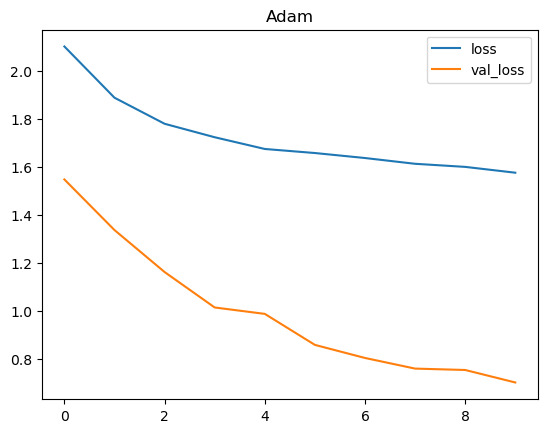

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


## Task 2
LaNet-5 <br /><br />
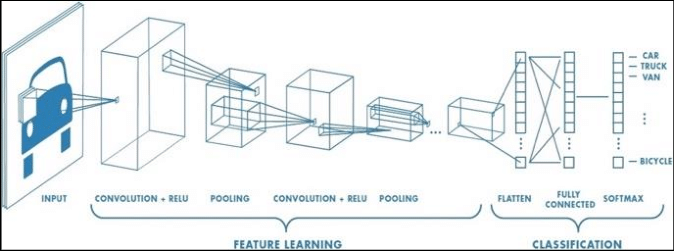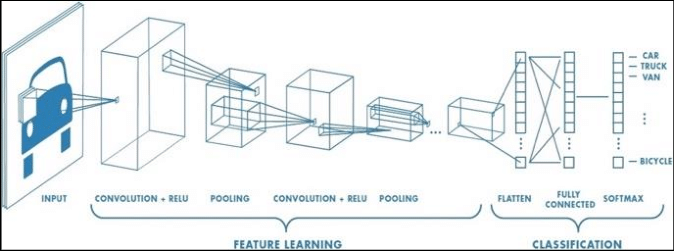

In [27]:
from keras.layers import AveragePooling2D

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(strides=2),
    Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 48)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [28]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,factor=0.2,min_lr=1e-6)
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1)

datagen.fit(x_train)
history_task_2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=100), steps_per_epoch=len(x_train)/100, epochs=30, validation_data=(x_val,y_val), callbacks=[reduce_lr])

Epoch 1/30
340/340 [==============================] - 9s 25ms/step - loss: 0.6553 - accuracy: 0.7900 - val_loss: 0.1394 - val_accuracy: 0.9574 - lr: 5.0000e-04
Epoch 2/30
340/340 [==============================] - 9s 25ms/step - loss: 0.1900 - accuracy: 0.9422 - val_loss: 0.1209 - val_accuracy: 0.9643 - lr: 5.0000e-04
Epoch 3/30
340/340 [==============================] - 8s 25ms/step - loss: 0.1355 - accuracy: 0.9585 - val_loss: 0.1150 - val_accuracy: 0.9646 - lr: 5.0000e-04
Epoch 4/30
340/340 [==============================] - 8s 25ms/step - loss: 0.1173 - accuracy: 0.9643 - val_loss: 0.0868 - val_accuracy: 0.9722 - lr: 5.0000e-04
Epoch 5/30
340/340 [==============================] - 9s 25ms/step - loss: 0.0977 - accuracy: 0.9698 - val_loss: 0.0555 - val_accuracy: 0.9815 - lr: 5.0000e-04
Epoch 6/30
340/340 [==============================] - 8s 25ms/step - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.0519 - val_accuracy: 0.9844 - lr: 5.0000e-04
Epoch 7/30
340/340 [====================

In [29]:
score = model.evaluate(x_val, y_val, batch_size=32)

119/119 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9913


In [30]:
# df_test = pd.read_csv('./train.csv')
# x_test = np.array(df_test)
x_test = x_test / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) 
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
y_test[:5]

132/132 [==============================] - 1s 4ms/step


array([1, 1, 1, 1, 1])

<AxesSubplot:title={'center':'Task 2'}>

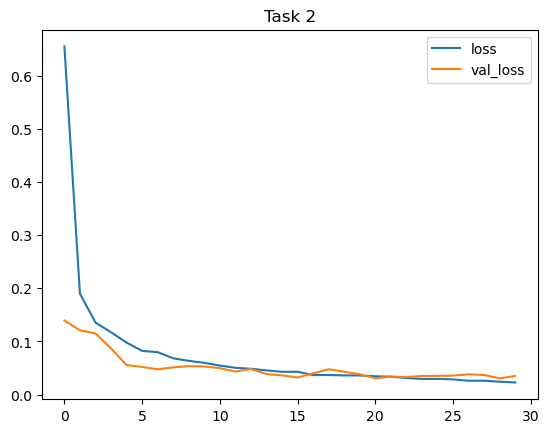

In [31]:
history_df = pd.DataFrame(history_task_2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Task 2")